In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
raw_data= pd.read_csv('train.csv')


## Introduction

In this task, we ask you to train a model that learns to rank properties in hotel search. 
This task is aimed to rank the search result for the customer based on the user and property features.


Here you can find the structure of this project:
- Exploratory data analysis
- Feature engineering
- Imbalance handling
- Building a classification model with XGBoost
- Feature importance
- conclusion


## Exploratory Data Analysis

We start by checking out how our data looks like.

In [3]:
pd.set_option('display.max_columns', None)
raw_data.head()

,srch_id,prop_key,srch_date_time,srch_visitor_id,srch_visitor_visit_nbr,srch_visitor_loc_country,srch_visitor_loc_region,srch_visitor_loc_city,srch_visitor_wr_member,srch_posa_continent,srch_posa_country,srch_hcom_destination_id,srch_dest_longitude,srch_dest_latitude,srch_ci,srch_co,srch_ci_day,srch_co_day,srch_los,srch_bw,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_mobile_bool,srch_mobile_app,srch_device,srch_currency,prop_travelad_bool,prop_dotd_bool,prop_price_without_discount_local,prop_price_without_discount_usd,prop_price_with_discount_local,prop_price_with_discount_usd,prop_imp_drr,prop_booking_bool,prop_brand_bool,prop_starrating,prop_super_region,prop_continent,prop_country,prop_market_id,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool,srch_local_date
0,-1046322713,257690,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,5,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",728660,135.498154,34.701897,2015-02-25,2015-02-28,4,7,3,164,2.0,0.0,1,0,0,DESKTOP,TWD,0,0,5605.0,186.72,3356.0,111.80,0,0,1,3.5,APAC,ASIA,JAPAN,60041,109140,575,4.1,403.0,0,2014-09-13
1,-1046322713,3066218,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,5,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",728660,135.498154,34.701897,2015-02-25,2015-02-28,4,7,3,164,2.0,0.0,1,0,0,DESKTOP,TWD,0,0,4614.0,153.71,2769.0,92.24,1,0,0,3.0,APAC,ASIA,JAPAN,60041,109140,339,3.6,101.0,0,2014-09-13
2,-1046322713,2271987,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,5,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",728660,135.498154,34.701897,2015-02-25,2015-02-28,4,7,3,164,2.0,0.0,1,0,0,DESKTOP,TWD,0,0,14026.0,467.25,2821.0,93.98,0,0,1,3.5,APAC,ASIA,JAPAN,60041,109140,179,4.1,1189.0,0,2014-09-13
3,-1046322713,3308025,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,5,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",728660,135.498154,34.701897,2015-02-25,2015-02-28,4,7,3,164,2.0,0.0,1,0,0,DESKTOP,TWD,0,0,14308.0,476.65,5202.0,173.30,0,0,1,5.0,APAC,ASIA,JAPAN,60041,98278,272,4.8,221.0,0,2014-09-13
4,-1046322713,3222046,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,5,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",728660,135.498154,34.701897,2015-02-25,2015-02-28,4,7,3,164,2.0,0.0,1,0,0,DESKTOP,TWD,0,0,5445.0,181.39,2589.0,86.25,0,0,0,3.0,APAC,ASIA,JAPAN,60041,109140,198,3.9,702.0,0,2014-09-13


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841115 entries, 0 to 841114
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   srch_id                            841115 non-null  int64  
 1   prop_key                           841115 non-null  int64  
 2   srch_date_time                     841115 non-null  object 
 3   srch_visitor_id                    841115 non-null  object 
 4   srch_visitor_visit_nbr             841115 non-null  int64  
 5   srch_visitor_loc_country           841115 non-null  object 
 6   srch_visitor_loc_region            840992 non-null  object 
 7   srch_visitor_loc_city              841115 non-null  object 
 8   srch_visitor_wr_member             396237 non-null  object 
 9   srch_posa_continent                355867 non-null  object 
 10  srch_posa_country                  841115 non-null  object 
 11  srch_hcom_destination_id           8411

In [5]:
raw_data.describe()

,srch_id,prop_key,srch_visitor_visit_nbr,srch_hcom_destination_id,srch_dest_longitude,srch_dest_latitude,srch_ci_day,srch_co_day,srch_los,srch_bw,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_mobile_bool,srch_mobile_app,prop_travelad_bool,prop_dotd_bool,prop_price_without_discount_local,prop_price_without_discount_usd,prop_price_with_discount_local,prop_price_with_discount_usd,prop_imp_drr,prop_booking_bool,prop_brand_bool,prop_starrating,prop_market_id,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool
count,8.411150e+05,8.411150e+05,841115.000000,8.411150e+05,841115.000000,841115.000000,841115.000000,841115.000000,841115.000000,841115.000000,841097.000000,841097.000000,841115.000000,841115.000000,841115.0,841115.000000,841115.000000,8.410640e+05,8.410640e+05,8.410640e+05,8.410640e+05,841115.000000,841115.000000,841115.000000,841115.000000,841115.000000,841115.000000,841115.000000,841107.000000,841107.000000,841115.000000
mean,1.724233e+07,8.185569e+05,12.325977,1.194309e+06,-45.892803,40.445932,4.272102,3.689650,2.677238,35.349157,2.019900,0.161467,1.113059,0.145173,0.0,0.012221,0.003809,1.204508e+04,4.527640e+02,8.519444e+03,3.044565e+02,0.425998,0.028549,0.664118,3.595627,71586.980101,106494.270656,631.116457,4.024048,2160.753578,0.002888
std,1.231757e+09,1.141255e+06,31.788936,4.237267e+05,77.706051,6.056537,2.003199,2.128168,2.192103,49.506785,1.020626,0.546063,0.447657,0.352275,0.0,0.109870,0.061601,1.679273e+05,6.864688e+03,1.130143e+05,4.205190e+03,0.494494,0.166535,0.472298,0.864574,39165.985756,7384.185494,1573.071335,0.547170,3075.169206,0.053661
min,-2.147275e+09,2.407460e+05,1.000000,5.042610e+05,-115.172875,28.541290,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,8.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,369.000000,60556.000000,-9998.000000,0.000000,0.000000,0.000000
25%,-1.034005e+09,2.559520e+05,1.000000,7.267840e+05,-115.172875,36.114666,3.000000,2.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.690000e+02,1.440000e+02,1.160000e+02,9.902000e+01,0.000000,0.000000,0.000000,3.000000,60039.000000,98238.000000,144.000000,3.800000,306.000000,0.000000
50%,3.193952e+07,2.777420e+05,3.000000,1.497539e+06,-73.986473,40.756680,5.000000,4.000000,2.000000,17.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,3.390000e+02,2.730000e+02,2.350000e+02,1.890000e+02,0.000000,0.000000,1.000000,4.000000,95602.000000,109153.000000,306.000000,4.100000,937.000000,0.000000
75%,1.081646e+09,4.781330e+05,10.000000,1.504033e+06,-0.127804,41.880779,6.000000,6.000000,3.000000,46.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,6.650000e+02,4.490000e+02,4.660000e+02,2.990000e+02,1.000000,0.000000,1.000000,4.000000,95656.000000,110287.000000,770.000000,4.400000,2550.000000,0.000000
max,2.147266e+09,3.949856e+06,1082.000000,1.506246e+06,139.759995,51.507538,7.000000,7.000000,28.000000,473.000000,16.000000,8.000000,8.000000,1.000000,0.0,1.000000,1.000000,3.195489e+07,1.976733e+06,1.762130e+07,1.087117e+06,1.000000,1.000000,1.000000,5.000000,116356.000000,116928.000000,19235.000000,5.000000,32399.000000,1.000000


In [6]:
raw_data['prop_booking_bool'].value_counts()

0    817102
1     24013
Name: prop_booking_bool, dtype: int64

It seems we have unbalanced data. We have to take care of that. 
It makes sense. For every search, the user has several options and will choose one or non of them. 

At first, we can remove features that seem not useful by looking at their statistics. 

Object variables related to the user's location and the location of the hotels can add some information to the model, but there are many classes in them, and it will increase the computational cost.
The latitude and longitude of the destination were removed, and some more features related to the location and region of the hotel will be added to the data.  

In [31]:
search_level=[
    'srch_id',                                                                # we need it for our Explonatory analysis. 
    #'srch_date_time',                                                        # It doesn't help our prediction
    #'srch_visitor_id',                                                       # It doesn't help our prediction
    'srch_visitor_visit_nbr', 
    #'srch_visitor_loc_country',
    #'srch_visitor_loc_region',
    #'srch_visitor_loc_city',                                                 
    'srch_visitor_wr_member',                                                # This feature could help but it has a lot of Null value 
    #'srch_posa_continent', 
    #'srch_posa_country',
    #'srch_hcom_destination_id', 
    #'srch_dest_longitude', 
    #'srch_dest_latitude',
    #'srch_ci', 'srch_co',
    #'srch_ci_day',
    #'srch_co_day', 
    #'srch_los',
    #'srch_bw',
    #'srch_adults_cnt',
    #'srch_children_cnt',
    #'srch_rm_cnt',
    #'srch_mobile_bool',
    'srch_mobile_app',
    'srch_device', 
    'srch_currency' 
    #'srch_local_date'
]

In [32]:
property_level=[
    'prop_key',                                                       # we need it for our Explonatory analysis.                                  
    'prop_travelad_bool',
    'prop_dotd_bool',
    #'prop_price_without_discount_local',                            # we have the USD one                        
    'prop_price_without_discount_usd',                               # we need both w/o discount for extracting features. 
    #'prop_price_with_discount_local', 
    'prop_price_with_discount_usd',
    'prop_imp_drr',
    'prop_brand_bool',
    'prop_starrating',
    #'prop_super_region', 
    #'prop_continent',
    # 'prop_country', 
    'prop_market_id', 
    'prop_submarket_id',
    'prop_room_capacity',
    'prop_review_score', 
    'prop_review_count',
    #'prop_hostel_bool',                                           # Vey Unbalanced object
    ]

In [33]:
#find the dataypes of features
target=["prop_booking_bool"]
refined_data=raw_data.loc[:,search_level+property_level +target]
refined_data

,srch_id,srch_visitor_visit_nbr,srch_visitor_wr_member,srch_mobile_app,srch_device,srch_currency,prop_key,prop_travelad_bool,prop_dotd_bool,prop_price_without_discount_usd,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_starrating,prop_market_id,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_booking_bool
0,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,257690,0,0,186.72,111.80,0,1,3.5,60041,109140,575,4.1,403.0,0
1,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3066218,0,0,153.71,92.24,1,0,3.0,60041,109140,339,3.6,101.0,0
2,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,2271987,0,0,467.25,93.98,0,1,3.5,60041,109140,179,4.1,1189.0,0
3,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3308025,0,0,476.65,173.30,0,1,5.0,60041,98278,272,4.8,221.0,0
4,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3222046,0,0,181.39,86.25,0,0,3.0,60041,109140,198,3.9,702.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841110,964783409,5,NaN,0,DESKTOP,NaN,249748,0,0,334.00,284.00,1,1,4.0,95656,85868,251,4.1,1928.0,0
841111,964783409,5,NaN,0,DESKTOP,NaN,255778,0,0,649.00,269.00,0,1,4.0,95656,96809,712,4.2,605.0,0
841112,964783409,5,NaN,0,DESKTOP,NaN,244678,0,0,285.00,225.00,0,0,3.0,95656,96809,369,4.0,5305.0,0
841113,964783409,5,NaN,0,DESKTOP,NaN,259221,0,0,559.00,314.00,0,1,4.0,95656,96812,770,4.2,1809.0,0


## Feature Engineering

In the serach query these features could be added to the current features:

- Search_Rank: The rank of the property in the given query

- Booking_Rate: booking rate of the property in the entire dataset

- price_ratio: Relative price value in the query compare to the rest of suggestions

- minornot: a boolean indicating whether the price of the property is minimum in the query

- Market Rate: The rate of the booking in the market and sub market ID, Indicating the popularity of the submarket

- Discount_rate: The discount percentage from the original price

- prop_starrating_rank: The rank of star rating of property in the query





In [34]:
def feature_extraction(Data):
     
    # Extracting Serach rank
    Data['search_rank'] = Data.groupby(['srch_id']).cumcount()+1
    
    #Extracting Price Ratio
    Data['max_price'] = Data.groupby(['srch_id'])['prop_price_with_discount_usd'].transform(max)
    Data['price_ratio']=Data.prop_price_with_discount_usd/Data.max_price
    Data.drop("max_price",axis=1,inplace=True)
    
    #Extracting minimum price or not
    Data['min_price'] = Data.groupby(['srch_id'])['prop_price_with_discount_usd'].transform(min)
    Data.loc[Data['prop_price_with_discount_usd'] == Data['min_price'] , 'minornot'] = 1
    Data.loc[Data['prop_price_with_discount_usd'] != Data['min_price'] , 'minornot'] = 0
    Data.drop("min_price",axis=1,inplace=True)

    # Extracting Market Rate
    Data['market_Rate'] = Data.groupby(['prop_market_id', 'prop_submarket_id'], as_index= False)['prop_booking_bool'].transform('mean')
    Market_rate =  Data[['prop_market_id', 'prop_submarket_id','market_Rate']].drop_duplicates()

    Data.drop('prop_market_id',axis=1,inplace=True)
    Data.drop('prop_submarket_id',axis=1,inplace=True)
    
    
    
    # Extracting discount rate for the property
    Data['discountrate'] = (Data.prop_price_without_discount_usd-Data.prop_price_with_discount_usd)/Data.prop_price_without_discount_usd
    Data.drop('prop_price_without_discount_usd',axis=1,inplace=True)
    
    # Extracting booking rate of the property
    Data['Booking_rate'] = Data.groupby(['prop_key'])['prop_booking_bool'].transform('mean')
    Booking_rate =  Data[['prop_key','Booking_rate']].drop_duplicates()
    
    # Extracting property star rating rank
    Data["prop_starrating_rank"] = Data.groupby("srch_id")["prop_starrating"].rank("dense", ascending=False)
    Data.drop('prop_starrating',axis=1,inplace=True)

    # Extracting room capacity rank
    Data["prop_room_capacity_rank"] = Data.groupby("srch_id")["prop_room_capacity"].rank("dense", ascending=False)
    Data.drop('prop_room_capacity',axis=1,inplace=True)
    
    # Extracting prop review score rank
    Data["prop_review_score_rank"] = Data.groupby("srch_id")["prop_review_score"].rank("dense", ascending=False)
    Data.drop('prop_review_score',axis=1,inplace=True)
    
    # Extracting prop review count rank
    Data["prop_review_count_rank"] = Data.groupby("srch_id")["prop_review_count"].rank("dense", ascending=False)
    Data.drop('prop_review_count',axis=1,inplace=True)
   
    
   # Data.drop('srch_id',axis=1,inplace=True)
   # Data.drop('prop_key',axis=1,inplace=True)
    
    return Data, Market_rate, Booking_rate
    

We are adding the extracted features to the dataset. Now see how it works

In [35]:

mydata, Market_rate, Booking_rate = feature_extraction(refined_data.copy())
mydata

,srch_id,srch_visitor_visit_nbr,srch_visitor_wr_member,srch_mobile_app,srch_device,srch_currency,prop_key,prop_travelad_bool,prop_dotd_bool,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_booking_bool,search_rank,price_ratio,minornot,market_Rate,discountrate,Booking_rate,prop_starrating_rank,prop_room_capacity_rank,prop_review_score_rank,prop_review_count_rank
0,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,257690,0,0,111.80,0,1,0,1,0.433754,0.0,0.043638,0.401243,0.019868,4.0,7.0,8.0,17.0
1,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3066218,0,0,92.24,1,0,0,2,0.357866,0.0,0.043638,0.399909,0.084932,5.0,12.0,12.0,38.0
2,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,2271987,0,0,93.98,0,1,0,3,0.364617,0.0,0.043638,0.798866,0.049383,4.0,29.0,8.0,2.0
3,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3308025,0,0,173.30,0,1,0,4,0.672357,0.0,0.034325,0.636421,0.060606,1.0,18.0,1.0,27.0
4,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3222046,0,0,86.25,0,0,0,5,0.334627,0.0,0.043638,0.524505,0.072435,5.0,26.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841110,964783409,5,NaN,0,DESKTOP,NaN,249748,0,0,284.00,1,1,0,49,0.291282,0.0,0.024787,0.149701,0.032999,3.0,34.0,7.0,18.0
841111,964783409,5,NaN,0,DESKTOP,NaN,255778,0,0,269.00,0,1,0,50,0.275897,0.0,0.033201,0.585516,0.038763,3.0,16.0,6.0,42.0
841112,964783409,5,NaN,0,DESKTOP,NaN,244678,0,0,225.00,0,0,0,51,0.230769,0.0,0.033201,0.210526,0.040398,5.0,25.0,8.0,5.0
841113,964783409,5,NaN,0,DESKTOP,NaN,259221,0,0,314.00,0,1,0,52,0.322051,0.0,0.026574,0.438283,0.009461,3.0,13.0,6.0,22.0


Here we handle the Null values and dolicate values

In [36]:
mydata.isnull().sum(axis = 0)

srch_id                              0
srch_visitor_visit_nbr               0
srch_visitor_wr_member          444878
srch_mobile_app                      0
srch_device                          0
srch_currency                   134104
prop_key                             0
prop_travelad_bool                   0
prop_dotd_bool                       0
prop_price_with_discount_usd        51
prop_imp_drr                         0
prop_brand_bool                      0
prop_booking_bool                    0
search_rank                          0
price_ratio                         51
minornot                             0
market_Rate                          0
discountrate                        53
Booking_rate                         0
prop_starrating_rank                 0
prop_room_capacity_rank              0
prop_review_score_rank               8
prop_review_count_rank               8
dtype: int64

In [44]:
123//10

3

In [37]:
mydata.dropna(inplace=True)
mydata.drop_duplicates(inplace=True)

Now let's check our dataset and relation between the extracted features and the ground truth

<AxesSubplot:>

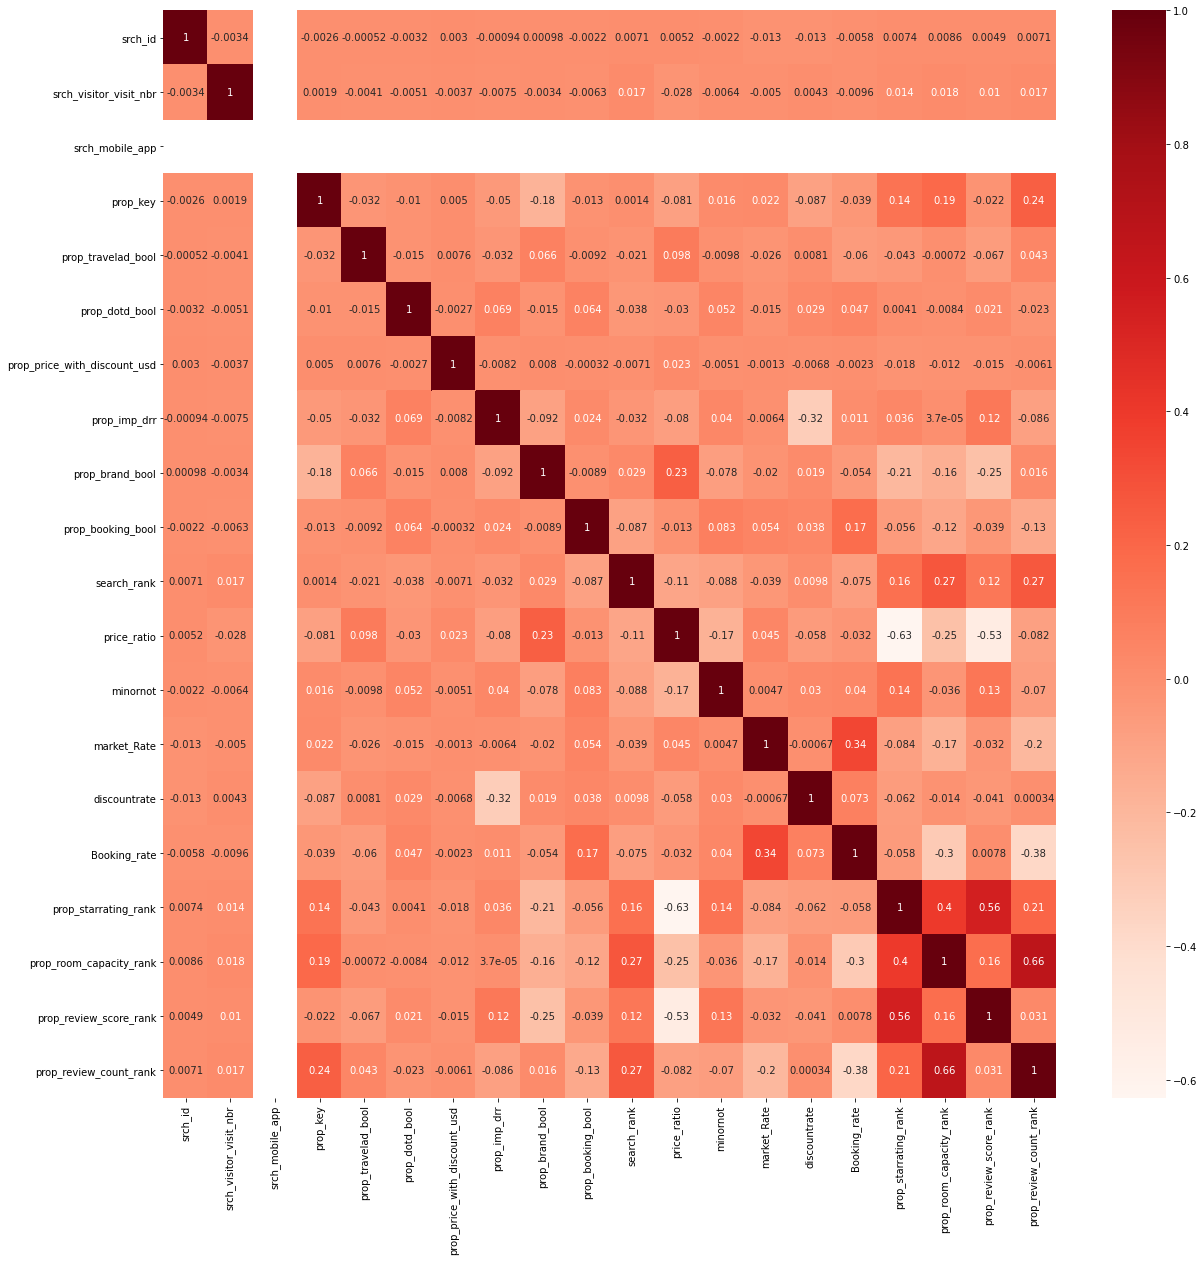

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns 

mydata.describe
plt.figure(figsize=(20,20))
cor=mydata.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

array([[<AxesSubplot:title={'center':'srch_id'}>,
        <AxesSubplot:title={'center':'srch_visitor_visit_nbr'}>,
        <AxesSubplot:title={'center':'srch_mobile_app'}>,
        <AxesSubplot:title={'center':'prop_key'}>],
       [<AxesSubplot:title={'center':'prop_travelad_bool'}>,
        <AxesSubplot:title={'center':'prop_dotd_bool'}>,
        <AxesSubplot:title={'center':'prop_price_with_discount_usd'}>,
        <AxesSubplot:title={'center':'prop_imp_drr'}>],
       [<AxesSubplot:title={'center':'prop_brand_bool'}>,
        <AxesSubplot:title={'center':'prop_booking_bool'}>,
        <AxesSubplot:title={'center':'search_rank'}>,
        <AxesSubplot:title={'center':'price_ratio'}>],
       [<AxesSubplot:title={'center':'minornot'}>,
        <AxesSubplot:title={'center':'market_Rate'}>,
        <AxesSubplot:title={'center':'discountrate'}>,
        <AxesSubplot:title={'center':'Booking_rate'}>],
       [<AxesSubplot:title={'center':'prop_starrating_rank'}>,
        <AxesSubplot:tit

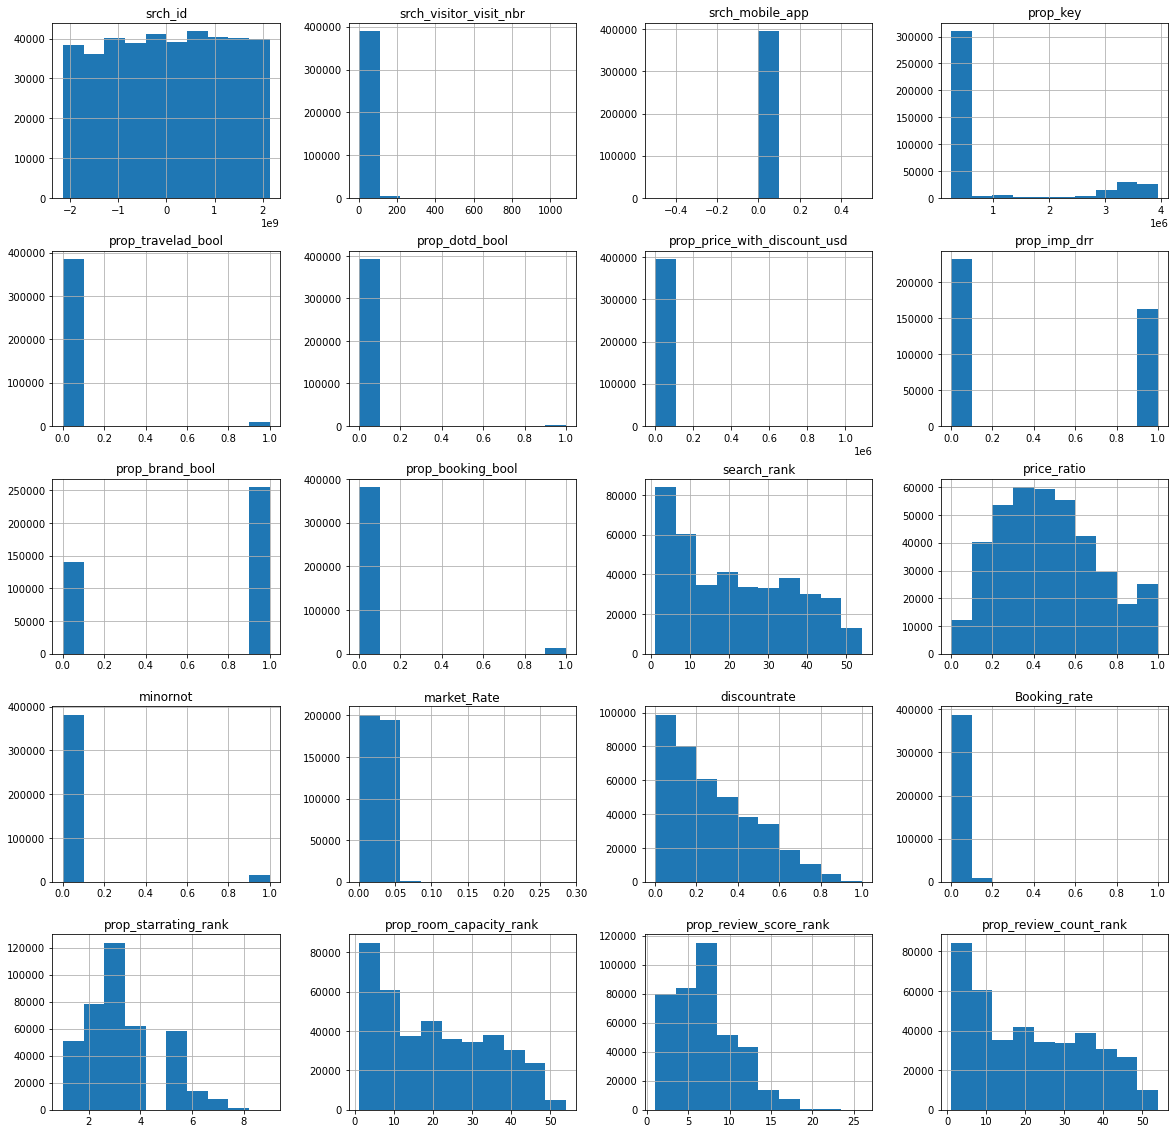

In [39]:
mydata.hist(figsize=(20,20))

In [41]:

mydata.to_csv('mydata.csv', index=False)
mydata

,srch_id,srch_visitor_visit_nbr,srch_visitor_wr_member,srch_mobile_app,srch_device,srch_currency,prop_key,prop_travelad_bool,prop_dotd_bool,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_booking_bool,search_rank,price_ratio,minornot,market_Rate,discountrate,Booking_rate,prop_starrating_rank,prop_room_capacity_rank,prop_review_score_rank,prop_review_count_rank
0,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,257690,0,0,111.80,0,1,0,1,0.433754,0.0,0.043638,0.401243,0.019868,4.0,7.0,8.0,17.0
1,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3066218,0,0,92.24,1,0,0,2,0.357866,0.0,0.043638,0.399909,0.084932,5.0,12.0,12.0,38.0
2,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,2271987,0,0,93.98,0,1,0,3,0.364617,0.0,0.043638,0.798866,0.049383,4.0,29.0,8.0,2.0
3,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3308025,0,0,173.30,0,1,0,4,0.672357,0.0,0.034325,0.636421,0.060606,1.0,18.0,1.0,27.0
4,-1046322713,5,Signed in - Persistent|WR Member|Remembered FC...,0,DESKTOP,TWD,3222046,0,0,86.25,0,0,0,5,0.334627,0.0,0.043638,0.524505,0.072435,5.0,26.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840754,698441772,1,Not Signed In|New Visitor|Not FC Member,0,DESKTOP,SEK,256241,0,0,261.66,1,0,0,33,0.632931,0.0,0.040299,0.150123,0.018773,2.0,6.0,5.0,3.0
840755,698441772,1,Not Signed In|New Visitor|Not FC Member,0,DESKTOP,SEK,265057,0,0,252.92,0,1,0,34,0.611790,0.0,0.024227,0.425613,0.015152,2.0,10.0,4.0,11.0
840756,698441772,1,Not Signed In|New Visitor|Not FC Member,0,DESKTOP,SEK,329289,0,0,413.41,1,0,0,35,1.000000,0.0,0.021553,0.150062,0.022472,1.0,3.0,2.0,7.0
840757,698441772,1,Not Signed In|New Visitor|Not FC Member,0,DESKTOP,SEK,328022,0,0,128.93,0,1,0,36,0.311870,0.0,0.053055,0.197348,0.029940,2.0,14.0,8.0,24.0


<AxesSubplot:xlabel='prop_travelad_bool'>

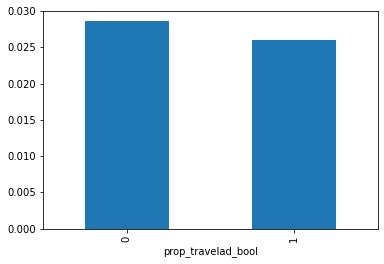

In [30]:
mydata[['prop_travelad_bool','prop_booking_bool']].groupby('prop_travelad_bool')['prop_booking_bool'].mean().plot(kind='bar')

<AxesSubplot:xlabel='minornot'>

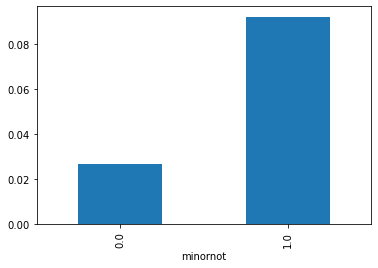

In [29]:
mydata[['minornot','prop_booking_bool']].groupby('minornot')['prop_booking_bool'].mean().plot(kind='bar')

<AxesSubplot:xlabel='prop_booking_bool'>

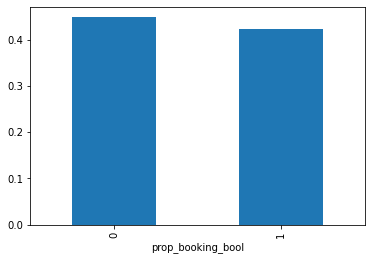

In [28]:
mydata[['price_ratio','prop_booking_bool']].groupby('prop_booking_bool')['price_ratio'].mean().plot(kind='bar')

<AxesSubplot:xlabel='prop_booking_bool'>

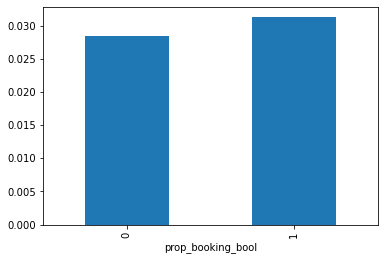

In [27]:
mydata[['market_Rate','prop_booking_bool']].groupby('prop_booking_bool')['market_Rate'].mean().plot(kind='bar')

In [ ]:
mydata[['discountrate','prop_booking_bool']].groupby('prop_booking_bool')['discountrate'].mean().plot(kind='bar')

<AxesSubplot:xlabel='prop_review_score_rank'>

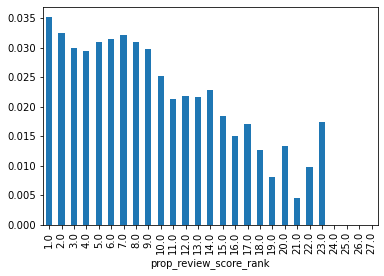

In [18]:
mydata[['prop_review_score_rank','prop_booking_bool']].groupby('prop_review_score_rank')['prop_booking_bool'].mean().plot(kind='bar')

<AxesSubplot:xlabel='prop_room_capacity_rank'>

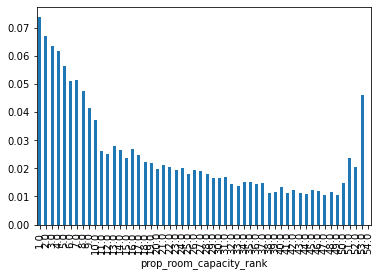

In [20]:
mydata[['prop_room_capacity_rank','prop_booking_bool']].groupby('prop_room_capacity_rank')['prop_booking_bool'].mean().plot(kind='bar')

<AxesSubplot:xlabel='prop_review_count_rank'>

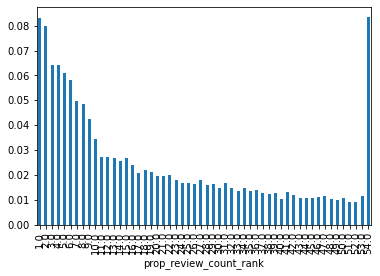

In [21]:
mydata[['prop_review_count_rank','prop_booking_bool']].groupby('prop_review_count_rank')['prop_booking_bool'].mean().plot(kind='bar')

<AxesSubplot:xlabel='prop_booking_bool'>

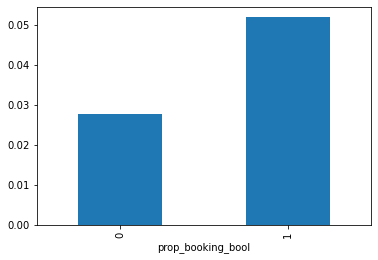

In [23]:
mydata[['Booking_rate','prop_booking_bool']].groupby('prop_booking_bool')['Booking_rate'].mean().plot(kind='bar')

<AxesSubplot:xlabel='prop_starrating_rank'>

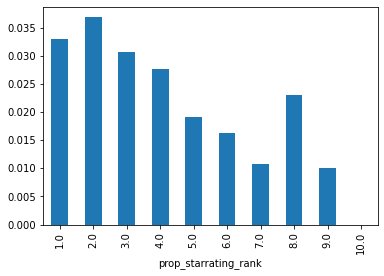

In [25]:
mydata[['prop_starrating_rank','prop_booking_bool']].groupby('prop_starrating_rank')['prop_booking_bool'].mean().plot(kind='bar')

# Preprocessing Data

Because We are going to use XGBoost model we don't need to preprocess the data. The tree models can perfectly work with multiscale variables. 

# Imbalance Data Handeling

First we keep 20% of the data for the test. We don't want to upsample or down sample the test dataset

In [75]:
from sklearn.utils import shuffle
# Randomly choosing 20% of the data for testing

mydata=shuffle(mydata)

np.random.seed(1001)
chosen_idx = np.random.choice(mydata.shape[0], replace=False, size=int(mydata.shape[0]*0.2))

# Choosing train and test data set
mydata_test= mydata[mydata.index.isin(chosen_idx)]
mydata_train= mydata[~mydata.index.isin(chosen_idx)]


# Creating Xtest and Ytest
X_test = mydata_test.iloc[:, mydata.columns != 'prop_booking_bool']
y_test = mydata_test.prop_booking_bool

# we need it for the test dataset
Final_col_name = X_test.columns

In [76]:
X_test

,srch_visitor_visit_nbr,prop_travelad_bool,prop_dotd_bool,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,search_rank,price_ratio,minornot,market_Rate,discountrate,Booking_rate,prop_starrating_rank,prop_room_capacity_rank,prop_review_score_rank,prop_review_count_rank
364620,4,0,0,300.25,1,1,21,0.928991,0.0,0.017157,0.000000,0.021575,1.0,3.0,5.0,43.0
97233,2,0,0,339.41,0,0,38,0.876666,0.0,0.037155,0.099828,0.028986,6.0,23.0,4.0,33.0
420888,2,0,0,274.00,0,1,13,0.301430,0.0,0.027655,0.083612,0.018182,2.0,13.0,9.0,3.0
11608,2,0,0,416.00,1,1,47,0.683087,0.0,0.023843,0.149284,0.013214,3.0,29.0,2.0,32.0
113142,8,0,0,209.00,0,1,22,0.492925,0.0,0.017538,0.417827,0.029028,3.0,28.0,10.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387911,1,0,0,147.00,1,0,7,0.127604,0.0,0.054473,0.103659,0.101551,3.0,21.0,7.0,4.0
228804,6,0,0,134.00,0,0,38,0.194485,0.0,0.031889,0.560656,0.075000,3.0,46.0,9.0,47.0
640180,12,0,0,287.00,1,1,33,0.767380,0.0,0.017538,0.003472,0.014596,2.0,29.0,3.0,30.0
448143,3,0,0,52.03,1,0,14,0.170702,0.0,0.034414,0.399954,0.028112,4.0,28.0,11.0,25.0


For data handeling two methods were used:
- Under Sampeling By reducing the majority class to the 0.8 ratio 
- SMOT( Synthetic Minority Oversampling Technique)

## Under Sampling

In [77]:
# Under Sampeling By reducing the majority class to the 0.8 ratio

from sklearn.utils import shuffle

mydata_train=shuffle(mydata_train)
class_count_0, class_count_1 =mydata_train['prop_booking_bool'].value_counts()

class_0=mydata_train[mydata_train['prop_booking_bool']==0]
class_1=mydata_train[mydata_train['prop_booking_bool']==1]
class_0_under=class_0.sample(class_count_1*4)
mydata_US=pd.concat([class_0_under,class_1])

# Creating Xtrain and Ytrain
X_train_US = mydata_US.iloc[:, mydata.columns != 'prop_booking_bool']
y_train_US = mydata_US.prop_booking_bool


print("Number of datasets before Under Sampling : ",mydata.shape[0] )
print("Ratio of booked labeles before Under Sampling : ",mydata.prop_booking_bool.mean()*100, "%")

print("Number of datasets after Under Sampling : ",mydata_US.shape[0])
print("Ratio of booked labeles after Under Sampling : ",mydata_US.prop_booking_bool.mean()*100, "%")

Number of datasets before Under Sampling :  840887
Ratio of booked labeles before Under Sampling :  2.8550804091393966 %
Number of datasets after Under Sampling :  96430
Ratio of booked labeles after Under Sampling :  20.0 %



## SMOT( Synthetic Minority Oversampling Technique)



In [78]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X_train = mydata_train.iloc[:, mydata.columns != 'prop_booking_bool']
y_train = mydata_train.prop_booking_bool

# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_SMOT, y_train_SMOT = pipeline.fit_resample(X_train,y_train)


print("Number of datasets before SMOT : ",mydata.shape[0] )
print("Ratio of booked labeles before SMOT : ",mydata.prop_booking_bool.mean()*100, "%")

print("Number of datasets after SMOT : ",X_train_SMOT.shape[0])
print("Ratio of booked labeles after SMOT : ",y_train_SMOT.mean()*100, "%")

Number of datasets before SMOT :  840887
Ratio of booked labeles before SMOT :  2.8550804091393966 %
Number of datasets after SMOT :  196038
Ratio of booked labeles after SMOT :  33.33333333333333 %


# Classification Models

Several models were tested and XGBoost model were chosen between them. 
SMOT showed better performance than Under Sampling. Thus this technique will be chosen for data inbalance handeling

In [79]:
from sklearn.model_selection import train_test_split
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import collections
from sklearn.metrics import ndcg_score
from sklearn.metrics import average_precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


def classification_metrics(Y_pred, Y_true):
	#TODO: Calculate the above mentioned metrics
	#NOTE: It is important to provide the output in the same order
    acc = accuracy_score(Y_true, Y_pred)
    fpr, tpr, thresholds = roc_curve(Y_true, Y_pred)
    auc_ = auc(fpr, tpr)
    precision = precision_score(Y_true,Y_pred)
    recall = recall_score(Y_true,Y_pred)
    F1score = f1_score(Y_true, Y_pred)
    
    return acc,auc_,precision,recall,F1score

#input: Name of classifier, predicted labels, actual labels
def display_metrics(classifierName,Y_pred,Y_true):
	print("______________________________________________")
	print(("Classifier: "+classifierName))
	acc, auc_, precision, recall, f1score = classification_metrics(Y_pred,Y_true)
	print(("Accuracy: "+str(acc)))
	print(("AUC: "+str(auc_)))
	print(("Precision: "+str(precision)))
	print(("Recall: "+str(recall)))
	print(("F1-score: "+str(f1score)))
	print("______________________________________________")
	print("")

## Traing Model

In [ ]:
Decision Tree
k-Nearest Neighbors
Artificial Neural Networks
Support Vector Machine
Bagged Decision Trees
Random Forest
Extra Trees
Stochastic Gradient Boosting

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid ={"class_weight": ['balanced']}
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train_SMOT, y_train_SMOT)

y_pred_clf = grid_result.predict(X_test)
#y_pred_US = model_xgboost_US.predict(X_test)


display_metrics('model xgboost with SMOT',y_pred_clf,y_test)

______________________________________________
Classifier: model xgboost with SMOT
Accuracy: 0.854534424513489
AUC: 0.5901531363601579
Precision: 0.0645958348040946
Recall: 0.31003811944091486
F1-score: 0.10691594245234792
______________________________________________



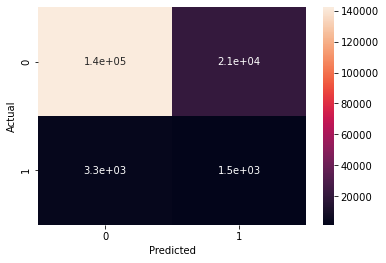

In [88]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':   y_test,
        'y_Predicted': y_pred_clf
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [118]:
pip install tensorflow --user

  Using cached tensorflow-2.3.1-cp37-cp37m-win_amd64.whl (342.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.14.0-cp37-cp37m-win_amd64.whl (798 kB)
Processing c:\users\mahmo\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2\termcolor-1.1.0-py3-none-any.whl
  Using cached numpy-1.18.5-cp37-cp37m-win_amd64.whl (12.7 MB)
  Using cached grpcio-1.33.2-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.4.0-py3-none-any.whl (10.6 MB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-1.23.0-py2.py3-none-any.whl (114 kB)
  Using cached Markdo

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [136]:
from tensorflow.keras  import Sequential
from tensorflow.keras import layers
from tensorflow import keras

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train_SMOT.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
    ])

    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model


In [139]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [140]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [142]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [144]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train_SMOT, 
    y_train_SMOT,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(X_test, y_test))

Epoch 1/100
96/96 [==============================] - 30s 309ms/step - loss: 34.8727 - tp: 34670.0000 - fp: 70435.0000 - tn: 60257.0000 - fn: 30676.0000 - accuracy: 0.4842 - precision: 0.3299 - recall: 0.5306 - auc: 0.4952 - val_loss: 0.4800 - val_tp: 88.0000 - val_fp: 2298.0000 - val_tn: 161116.0000 - val_fn: 4634.0000 - val_accuracy: 0.9588 - val_precision: 0.0369 - val_recall: 0.0186 - val_auc: 0.5266
Epoch 2/100
96/96 [==============================] - 1s 11ms/step - loss: 21.0239 - tp: 20727.0000 - fp: 40455.0000 - tn: 90237.0000 - fn: 44619.0000 - accuracy: 0.5660 - precision: 0.3388 - recall: 0.3172 - auc: 0.5095 - val_loss: 0.4727 - val_tp: 160.0000 - val_fp: 3834.0000 - val_tn: 159580.0000 - val_fn: 4562.0000 - val_accuracy: 0.9501 - val_precision: 0.0401 - val_recall: 0.0339 - val_auc: 0.5330
Epoch 3/100
96/96 [==============================] - 1s 10ms/step - loss: 15.0712 - tp: 22375.0000 - fp: 42746.0000 - tn: 87946.0000 - fn: 42971.0000 - accuracy: 0.5628 - precision: 0.343

In [152]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
          plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
          plt.ylim([0,1])
        else:
          plt.ylim([0,1])

        plt.legend()

In [153]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

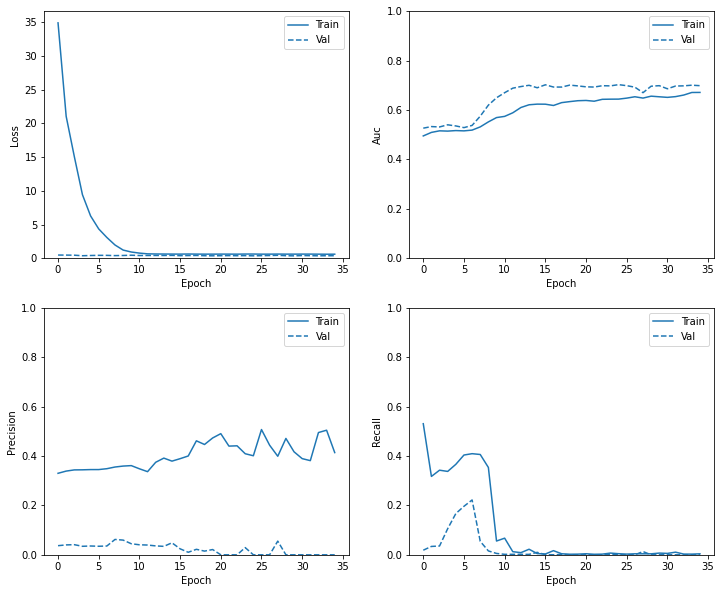

In [154]:



plot_metrics(baseline_history)

In [157]:
y_pred_avali = model.predict(X_test)
y_pred_avali = (y_pred_avali > 0.4)

display_metrics('model xgboost with SMOT',y_pred_avali,y_test)

______________________________________________
Classifier: model xgboost with SMOT
Accuracy: 0.8759278203359185
AUC: 0.6102077561186012
Precision: 0.08065270487969652
Recall: 0.32867429055484965
F1-score: 0.1295222199040267
______________________________________________



In [180]:
from tensorflow.keras  import Sequential
from tensorflow.keras import layers

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc',curve="PR"),
]

early_stopping_dovomi = tf.keras.callbacks.EarlyStopping(
    monitor='val_precision', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

classifier = Sequential()
#add input layer and first hidden layer
classifier.add(layers.Dense( 6, activation = 'relu'))
#classifier.add(layers.Dropout(0.5))
#add 2nd hidden layer
classifier.add(layers.Dense( 12, activation = 'relu') )
#classifier.add(layers.Dropout(0.5))

classifier.add(layers.Dense( 6, activation = 'relu') )
#classifier.add(layers.Dropout(0.5))

classifier.add(layers.Dense( 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics = [keras.metrics.Precision(name='precision')])

classifier.fit(X_train_SMOT, y_train_SMOT, batch_size = 64, epochs = 1000, callbacks = [early_stopping_dovomi], validation_data=(X_test, y_test))

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)



Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3064/3064 [==============================] - 4s 1ms/step - loss: 0.5941 - precision: 0.6207 - val_loss: 0.4102 - val_precision: 0.0847
Epoch 2/1000
3064/3064 [==============================] - 4s 1ms/step - loss: 0.5616 - precision: 0.6509 - val_loss: 0.3738 - val_precision: 0.0934
Epoch 3/1000
3064/3064 [==============================] - 4s 1ms/step - loss: 0.5495 - precision: 0.6446 - val_loss: 0.3458 - val_precision: 0.0905
Epoch 4/1000
3064/3064 [==============================] - 4s 1ms

In [181]:
display_metrics('model xgboost with SMOT',y_pred,y_test)

______________________________________________
Classifier: model xgboost with SMOT
Accuracy: 0.9435694913641338
AUC: 0.578579232090168
Precision: 0.1377318333840073
Recall: 0.19186785260482847
F1-score: 0.16035398230088496
______________________________________________



In [159]:
y_pred = classifier.predict(X_test)
y_pred

array([[0.05557835],
       [0.06665489],
       [0.28252268],
       ...,
       [0.03921989],
       [0.2684985 ],
       [0.20996135]], dtype=float32)

In [80]:

xgb = XGBClassifier(tree_method = 'gpu_hist', predictor = "gpu_predictor", eval_metric = 'auc', objective = 'binary:logistic' )

param_grid ={"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

                            
xgb_rscv = RandomizedSearchCV(xgb, param_distributions = param_grid, scoring = 'f1',cv = 5, verbose = 0, random_state = 40)

# Fit the model

                            
model_xgboost_SMOT = xgb_rscv.fit(X_train_US, y_train_US)  
                                      



C:\Users\mahmo\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mahmo\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\ProgramData\Anaconda3\lib\site-packag

XGBoostError: [16:03:52] src/learner.cc:180: XGBoost version not compiled with GPU support.

In [ ]:
y_pred_SMOT = model_xgboost_SMOT.predict(X_test)
#y_pred_US = model_xgboost_US.predict(X_test)


display_metrics('model xgboost with SMOT',y_pred_SMOT,y_test)


The F1-Score, the Recall and Precision are the features that are important in our modeling. 
The SMOT is showing slightly better performance in F1-Score and Recall. This is becaue SMOT is producing new data instead on duplicating or reducing the data.
Undersampling is causing loosing some of the data which can cause loosing information. 


In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':   y_test,
        'y_Predicted': y_pred_SMOT
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

## Feature Importance

In this step, the importance of the features will be evaluated. 

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
from matplotlib import pyplot as plt

sorted_idx = model_xgboost_SMOT.best_estimator_.feature_importances_.argsort()
plt.barh(X_train_US.columns[sorted_idx], model_xgboost_SMOT.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

- Obviously, for a user, the star rating of the property is the essential feature. People choose their hotels considering the review and the rating of the hotel.
- The hotels with good reviews will be chosen, so it is no wonder that these properties' booking rates can help rank them. 
- The price of the hotel is the second factor. Usually, after the star rating, the users look for the cheapest options. So having a minimum price between the options is an essential factor in ranking. 
- Other vital factors are including review rank, branding, how big the property is, the rate of the booking of that market, the rank of the option in the query, and so on. 

> # Testing on the test dataset

Now lets work with the test dataset and submit the work!

In [89]:
test_data=pd.read_csv("test.csv")

test_data.isnull().sum(axis = 0)

srch_id                                   0
prop_key                                  0
srch_date_time                            0
srch_visitor_id                           0
srch_visitor_visit_nbr                    0
srch_visitor_loc_country                  0
srch_visitor_loc_region                 111
srch_visitor_loc_city                     0
srch_visitor_wr_member               181968
srch_posa_continent                  202751
srch_posa_country                         0
srch_hcom_destination_id                  0
srch_dest_longitude                       0
srch_dest_latitude                        0
srch_ci                                   0
srch_co                                   0
srch_ci_day                               0
srch_co_day                               0
srch_los                                  0
srch_bw                                   0
srch_adults_cnt                           0
srch_children_cnt                         0
srch_rm_cnt                     

We need to deal with Null values.
Since I need to keep all the observations, we will replace the NA with the mean value of the column. 

In [98]:
# choosing the desired columns for handeling NA
na_features = ['prop_review_count','prop_review_score','prop_price_with_discount_usd','prop_price_with_discount_local','prop_price_without_discount_usd','prop_price_without_discount_local']
test_data[na_features] = test_data[na_features].fillna(value=test_data[na_features].mean(), inplace=False)
test_data.isnull().sum(axis = 0)

srch_id                                   0
prop_key                                  0
srch_date_time                            0
srch_visitor_id                           0
srch_visitor_visit_nbr                    0
srch_visitor_loc_country                  0
srch_visitor_loc_region                 111
srch_visitor_loc_city                     0
srch_visitor_wr_member               181968
srch_posa_continent                  202751
srch_posa_country                         0
srch_hcom_destination_id                  0
srch_dest_longitude                       0
srch_dest_latitude                        0
srch_ci                                   0
srch_co                                   0
srch_ci_day                               0
srch_co_day                               0
srch_los                                  0
srch_bw                                   0
srch_adults_cnt                           0
srch_children_cnt                         0
srch_rm_cnt                     

In [99]:
def feature_extraction_test(Data, Market_rate, Booking_rate):
     
    # Extracting Serach rank
    Data['search_rank'] = Data.groupby(['srch_id']).cumcount()+1
    
    #Extracting Price Ratio
    Data['max_price'] = Data.groupby(['srch_id'])['prop_price_with_discount_usd'].transform(max)
    Data['price_ratio']=Data.prop_price_with_discount_usd/Data.max_price
    Data.drop("max_price",axis=1,inplace=True)
    
    #Extracting minimum price or not
    Data['min_price'] = Data.groupby(['srch_id'])['prop_price_with_discount_usd'].transform(min)
    Data.loc[Data['prop_price_with_discount_usd'] == Data['min_price'] , 'minornot'] = 1
    Data.loc[Data['prop_price_with_discount_usd'] != Data['min_price'] , 'minornot'] = 0
    Data.drop("min_price",axis=1,inplace=True)

    # Extracting Market Rate
    Data = pd.merge(Data,Market_rate, on=['prop_market_id', 'prop_submarket_id'])
    Data.drop('prop_market_id',axis=1,inplace=True)
    Data.drop('prop_submarket_id',axis=1,inplace=True)
    
    
    # Extracting discount rate for the property
    Data['discountrate'] = (Data.prop_price_without_discount_usd-Data.prop_price_with_discount_usd)/Data.prop_price_without_discount_usd
    Data.drop('prop_price_without_discount_usd',axis=1,inplace=True)
    
    # Extracting booking rate of the property
    Data = pd.merge(Data,Booking_rate, on=['prop_key'])

    
    # Extracting property star rating rank
    Data["prop_starrating_rank"] = Data.groupby("srch_id")["prop_starrating"].rank("dense", ascending=False)
    Data.drop('prop_starrating',axis=1,inplace=True)

    # Extracting room capacity rank
    Data["prop_room_capacity_rank"] = Data.groupby("srch_id")["prop_room_capacity"].rank("dense", ascending=False)
    Data.drop('prop_room_capacity',axis=1,inplace=True)
    
    # Extracting prop review score rank
    Data["prop_review_score_rank"] = Data.groupby("srch_id")["prop_review_score"].rank("dense", ascending=False)
    Data.drop('prop_review_score',axis=1,inplace=True)
    
    # Extracting prop review count rank
    Data["prop_review_count_rank"] = Data.groupby("srch_id")["prop_review_count"].rank("dense", ascending=False)
    Data.drop('prop_review_count',axis=1,inplace=True)
   

    
    return Data
    

In [100]:
mytestdata = feature_extraction_test(test_data.copy(), Market_rate, Booking_rate)

# selecting same coumns as trainig dataset
columns = list(Final_col_name) + ['srch_id','prop_key']
#columns = list(Final_col_name)
mytestdata = mytestdata[columns]
mytestdata.to_csv('mytestdata.csv', index= False)
mytestdata

,srch_visitor_visit_nbr,prop_travelad_bool,prop_dotd_bool,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,search_rank,price_ratio,minornot,market_Rate,discountrate,Booking_rate,prop_starrating_rank,prop_room_capacity_rank,prop_review_score_rank,prop_review_count_rank,srch_id,prop_key
0,3,0,0,199.00,0,0,1,0.204103,0.0,0.033201,0.628037,0.064343,3.0,48.0,5.0,47.0,-1087756044,3075608
1,5,0,0,311.00,1,0,13,0.289302,0.0,0.033201,0.198454,0.064343,3.0,48.0,6.0,47.0,-2082689725,3075608
2,11,0,0,395.25,1,0,41,0.687391,0.0,0.033201,0.150000,0.064343,3.0,45.0,5.0,43.0,-488718586,3075608
3,25,0,0,379.00,1,0,42,0.602544,0.0,0.033201,0.050125,0.064343,3.0,43.0,4.0,47.0,961100126,3075608
4,2,0,0,269.00,0,0,27,0.275897,0.0,0.033201,0.518784,0.064343,3.0,48.0,3.0,51.0,969295275,3075608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351142,1,0,0,102.14,1,0,37,0.228409,0.0,0.041667,0.350296,0.000000,4.0,28.0,15.0,31.0,1767650487,3234962
351143,6,0,0,102.93,0,0,39,0.219593,0.0,0.041667,0.000000,0.000000,6.0,31.0,14.0,34.0,-932795151,2747578
351144,1,0,0,71.35,0,0,43,0.159555,0.0,0.000000,0.093162,0.000000,5.0,32.0,19.0,35.0,1767650487,3918072
351145,6,0,0,71.26,0,0,36,0.152028,0.0,0.000000,0.100025,0.000000,5.0,36.0,19.0,40.0,-932795151,3918072


In [105]:
mytestdata[Final_col_name].isnull().sum(axis = 0)

mytestdata[pd.isnull(mytestdata).any(axis=1)]
mytestdata['discountrate'] = mytestdata['discountrate'].fillna(value=mytestdata['discountrate'].mean(), inplace=False)

Now we predict the probability of choosing the property using the trained models 

We use the prediction probabilty as ranking index for the properties in the query. 

In [182]:
# predicting the booking probability 
#test_result_SMOT = np.array(model_xgboost_SMOT.predict_proba(mytestdata[Final_col_name]))
#test_result_clf = np.array(grid_result.predict_proba(mytestdata[Final_col_name]))
test_result_ANN = np.array(classifier.predict(mytestdata[Final_col_name]))


# creating the ranking dataframe
SMOT_Ranking=pd.DataFrame({'srch_id':mytestdata['srch_id'],'prop_key':mytestdata['prop_key'], 'prop_booking_bool':test_result_ANN[:,0]})
#SMOT_Ranking=pd.DataFrame({'srch_id':mytestdata['srch_id'],'prop_key':mytestdata['prop_key'], 'prop_booking_bool':test_result_ANN[:,1]})
#UST_Ranking=pd.DataFrame({'srch_id':mytestdata['srch_id'],'prop_key':mytestdata['prop_key'], 'prop_booking_bool':test_result_US[:,1]})

SMOT_Ranking

,srch_id,prop_key,prop_booking_bool
0,-1087756044,3075608,0.244087
1,-2082689725,3075608,0.059977
2,-488718586,3075608,0.019648
3,961100126,3075608,0.026717
4,969295275,3075608,0.160777
...,...,...,...
351142,1767650487,3234962,0.091560
351143,-932795151,2747578,0.096526
351144,1767650487,3918072,0.085600
351145,-932795151,3918072,0.058686


Now we rank the properties in each search based on the probability

In [183]:
# ranking the properties in each search
SMOT_Ranking= SMOT_Ranking.sort_values(["srch_id"], ascending=True) \
    .groupby(["srch_id"], sort=False) \
    .apply(lambda x: x.sort_values(['prop_booking_bool'], ascending=False)) \
    .reset_index(drop=True)
SMOT_Ranking

,srch_id,prop_key,prop_booking_bool
0,-2147403968,358698,0.487195
1,-2147403968,358614,0.412040
2,-2147403968,544714,0.388809
3,-2147403968,270584,0.259354
4,-2147403968,363864,0.259175
...,...,...,...
351142,2146902698,257087,0.009295
351143,2146902698,249701,0.009016
351144,2146902698,254658,0.008041
351145,2146902698,1106719,0.007192


In [184]:
SMOT_Ranking.iloc[:,0:2].to_csv('pred_booking_bool.csv', index=False)